<a href="https://colab.research.google.com/github/vataliya/cav_security_attacls/blob/main/cav_sec_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
cd drive/My\ Drive/Colab\ Notebooks/kdd99/NSL-KDD

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/kdd99/NSL-KDD'
/content/drive/My Drive/Colab Notebooks/kdd99/NSL-KDD


In [47]:
import time
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [48]:
columns = ['duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'labels'
]


In [49]:
cav_attacks_list = [
    'ipsweep',
    'imap',
    'mailbomb', 
    'neptune', 
    'pod', 
    'smurf', 
    'teardrop', 
    'udpstorm',
    'buffer_overflow', 
    'httptunnel',
    'ftp_write', 
    'guess_passwd', 
    'worm', 
    'xsnoop',
    'normal']

In [50]:
columns_sc = ['duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]

In [51]:
nsl_kdd_20p_train = pd.read_csv('KDDTrain+_20Percent.txt', names = columns, index_col=False)
cav_train = nsl_kdd_20p_train[nsl_kdd_20p_train['labels'].isin(cav_attacks_list)]

In [52]:
nsl_kdd_20p_test = pd.read_csv('KDDTest-21.txt', names = columns, index_col=False)
cav_test = nsl_kdd_20p_test[nsl_kdd_20p_test['labels'].isin(cav_attacks_list)]

In [53]:
attacks = np.concatenate((nsl_kdd_20p_train['labels'].unique(),nsl_kdd_20p_test['labels'].unique()))
attacks = np.unique(attacks)

In [54]:
nsl_kdd_20p_train_list = nsl_kdd_20p_train['labels'].value_counts()
cav_train_list = cav_train['labels'].value_counts()
nsl_kdd_20p_test_list = nsl_kdd_20p_test['labels'].value_counts()
cav_test_list = cav_test['labels'].value_counts()

In [55]:
dataset_values = pd.DataFrame(index = attacks, 
                              columns = ['NSL_KDD_Train', 'NSL_KDD_Test'])
#                                          ,'CAV_Train', 'CAV_Test'])
dataset_values['NSL_KDD_Train'] = nsl_kdd_20p_train_list
dataset_values['NSL_KDD_Test'] = nsl_kdd_20p_test_list
dataset_values['CAV_Train'] = cav_train_list
dataset_values['CAV_Test'] = cav_test_list
dataset_values.sort_values(by=['NSL_KDD_Train'], ascending = False)

,NSL_KDD_Train,NSL_KDD_Test,CAV_Train,CAV_Test
normal,13449.0,2152.0,13449.0,2152.0
neptune,8282.0,1579.0,8282.0,1579.0
ipsweep,710.0,141.0,710.0,141.0
satan,691.0,727.0,NaN,NaN
portsweep,587.0,156.0,NaN,NaN
smurf,529.0,627.0,529.0,627.0
nmap,301.0,73.0,NaN,NaN
back,196.0,359.0,NaN,NaN
teardrop,188.0,12.0,188.0,12.0
warezclient,181.0,NaN,NaN,NaN


In [56]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for i in columns:
    cav_train[i] = le.fit_transform(cav_train[i])
    cav_test[i] = le.fit_transform(cav_test[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
x_train = cav_train.drop(columns= ['labels'])
y_train = cav_train['labels']

x_test = cav_test.drop(columns= ['labels'])
y_test = cav_test['labels']

In [58]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
#scaling the data
sc=StandardScaler()
xsc_train = sc.fit_transform(x_train)
xsc_test = sc.transform(x_test)

xsc_train=pd.DataFrame(xsc_train, columns = columns_sc)
xsc_test=pd.DataFrame(xsc_test, columns = columns_sc)

X_loc_train = xsc_train.iloc[:,:].values
X_loc_test = xsc_test.iloc[:,:].values

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components = 2)
x_pca_train = pca.fit_transform(xsc_train)
print(x_pca_train.shape)

x_pca_train =pd.DataFrame(x_pca_train)
X_pca_loc_train = x_pca_train.iloc[:,:].values

(23218, 2)


In [63]:
pca = PCA(n_components = 2)
x_pca_test = pca.fit_transform(xsc_test)
print(x_pca_test.shape)

x_pca_test = pd.DataFrame(x_pca_test)
X_pca_loc_test = x_pca_test.iloc[:,:].values

(6241, 2)


In [64]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [65]:
dataset = x_pca_train
X = X_pca_loc_train

Number of Cluster: 3 and Noise: 49
Time Elapsed: 1.855970859527588 


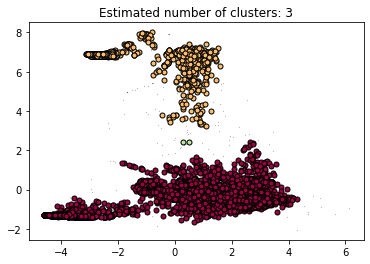

In [66]:
#DBSCAN Algorithm
start_time = time.time()
clustering = DBSCAN(min_samples = 10, n_jobs=-1).fit(dataset)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Cluster:',n_clusters_,'and Noise:', n_noise_)

# Plotting the DBSCAN Clusters:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=0.1)

end_time = time.time()
duration = end_time - start_time
print("Time Elapsed: {} ".format(duration))

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [67]:
dataset = x_pca_test
X = X_pca_loc_test

Number of Cluster: 4 and Noise: 11
Time Elapsed: 0.1887965202331543 


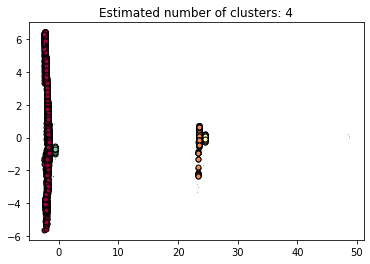

In [68]:
#DBSCAN Algorithm
start_time = time.time()
clustering = DBSCAN(min_samples = 10, n_jobs=-1).fit(dataset)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Cluster:',n_clusters_,'and Noise:', n_noise_)

# Plotting the DBSCAN Clusters:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=0.1)

end_time = time.time()
duration = end_time - start_time
print("Time Elapsed: {} ".format(duration))

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

For n_clusters = 3 , the average silhouette_score is : 0.6279582888041783
For n_clusters = 5 , the average silhouette_score is : 0.6860788997295513
For n_clusters = 7 , the average silhouette_score is : 0.6839086604363935
For n_clusters = 9 , the average silhouette_score is : 0.6818637449500208
Time Elapsed: 6.232499599456787 


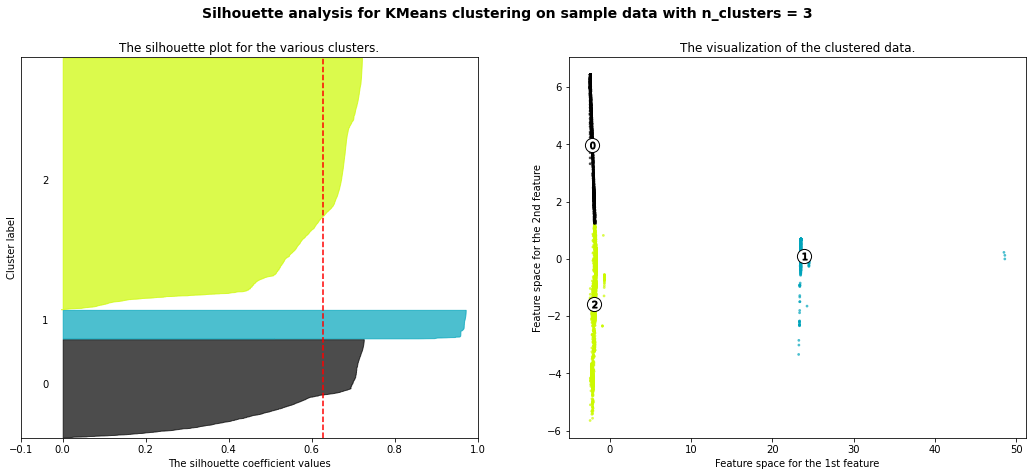

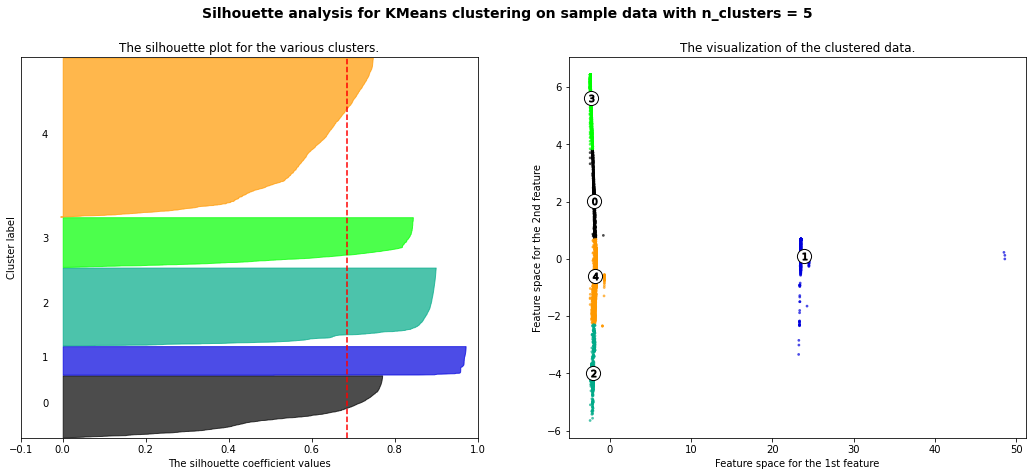

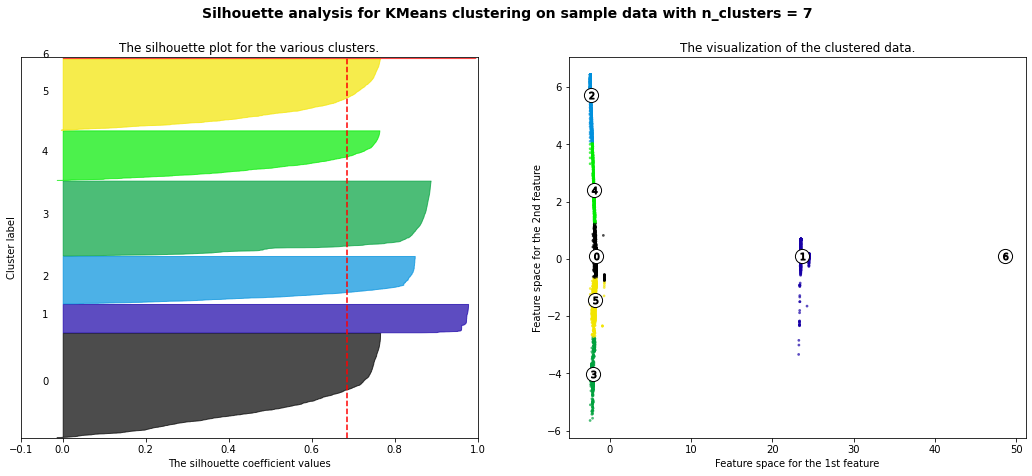

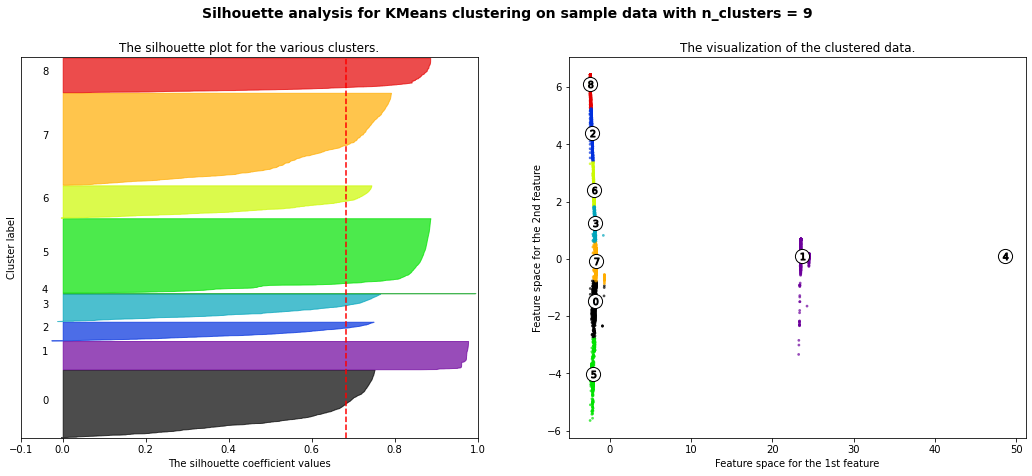

In [69]:
#KMeans Clustering Algorithm:
range_n_clusters = range(3,(11),2)
silhouette_scores = []
labels_list = []
start_time = time.time()

# Initialize the clusterer with n_clusters value:
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(dataset)
    cluster_labels = clusterer.labels_
    labels_list.append(cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,", the average silhouette_score is :", silhouette_avg)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

end_time = time.time()
duration = end_time - start_time
print("Time Elapsed: {} ".format(duration))

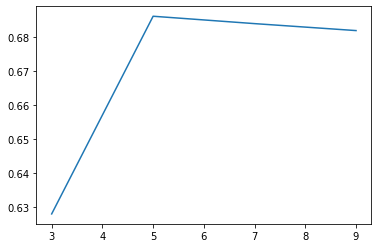

In [71]:
plt.plot(range(3,11,2), silhouette_scores)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [73]:
#Performing kNN model  5 fold cross validation:
start_time = time.time()
k_acc_scores = []
k_cv_scores = []
k_values = [i for i in range(20,100,20)] #evaluating values of k as all odd numbers between 1 and 20

for k in k_values:
    print(k)
    knn = KNeighborsClassifier(n_neighbors = 100)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    k_acc_scores.append("k({}) = {}".format(k, accuracy_score(y_test, pred)))
    cv_scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy', n_jobs = -1)
    print(cv_scores)
    k_cv_scores.append(cv_scores.mean())

end_time = time.time()
duration = end_time-start_time
print("Time Elapsed: {} ".format(duration))

20


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.98557278 0.98535745 0.9870801  0.98363127 0.982339  ]
40


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.98557278 0.98535745 0.9870801  0.98363127 0.982339  ]
60


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.98557278 0.98535745 0.9870801  0.98363127 0.982339  ]
80


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.98557278 0.98535745 0.9870801  0.98363127 0.982339  ]
Time Elapsed: 33.87952136993408 


In [74]:
#Evaluating Performance metrics for kNN Classifier model:
print(max(k_acc_scores))
print(max(k_cv_scores))
# print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

k(80) = 0.046947604550552795
0.9847961227509835
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00      1231
           3       0.00      0.00      0.00       133
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00       141
           6       0.07      1.00      0.14       293
           7       0.00      0.00      0.00      1579
           8       0.00      0.00      0.00      2152
           9       0.00      0.00      0.00        41
          10       0.00      0.00      0.00       627
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4

    accuracy                           0.05      6241
   macro avg       0.00      0.0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# import keras
# from keras import layers

# # This is the size of our encoded representations
# encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# # This is our input image
# input_img = keras.Input(shape=(784,))
# # "encoded" is the encoded representation of the input
# encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# # "decoded" is the lossy reconstruction of the input
# decoded = layers.Dense(784, activation='sigmoid')(encoded)

# # This model maps an input to its reconstruction
# autoencoder = keras.Model(input_img, decoded)

In [76]:
from keras.layers import Input,Dense
from keras.models import Model

# number of neurons in the encoding hidden layer
encoding_dim = 82
# input placeholder
input_data = Input(shape=(41,)) # 6 is the number of features/columns
# encoder is the encoded representation of the input
encoded = Dense(encoding_dim, activation ='relu')(input_data)
# decoder is the lossy reconstruction of the input
decoded = Dense(41, activation ='sigmoid')(encoded) # 6 again number of features and should match input_data


# this model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_data, encoded)
# model optimizer and loss
autoencoder = Model(input_data, decoded)

# loss function and optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [77]:
# train test split
# from sklearn.model_selection import train_test_split
# x_train, x_test, = train_test_split(data, test_size=0.1, random_state=42)

# train the model
autoencoder.fit(x_train,
                x_train,
                epochs=50,
                batch_size=256,
                shuffle=True)

autoencoder.summary()

Epoch 1/50
91/91 [==============================] - 0s 2ms/step - loss: -27992.0332
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: -173654.9531
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: -541597.5000
Epoch 4/50
91/91 [==============================] - 0s 2ms/step - loss: -1152967.2500
Epoch 5/50
91/91 [==============================] - 0s 2ms/step - loss: -2028485.3750
Epoch 6/50
91/91 [==============================] - 0s 2ms/step - loss: -3153870.0000
Epoch 7/50
91/91 [==============================] - 0s 2ms/step - loss: -4522485.5000
Epoch 8/50
91/91 [==============================] - 0s 2ms/step - loss: -6125521.5000
Epoch 9/50
91/91 [==============================] - 0s 2ms/step - loss: -7944354.0000
Epoch 10/50
91/91 [==============================] - 0s 2ms/step - loss: -9962773.0000
Epoch 11/50
91/91 [==============================] - 0s 2ms/step - loss: -12172849.0000
Epoch 12/50
91/91 [==============================] - 0s

In [78]:
# predict after training
# note that we take them from the *test* set
encoded_data = encoder.predict(x_test)

In [79]:
x_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,8,411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,90,0,0,150,25,17,3,17,0,0,0,5,0
1,0,2,40,8,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,8,15,0,255,1,0,60,88,0,0,0,0,0
2,0,1,44,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,5,53,55,0,0,5,7,0,255,26,10,5,0,0,99,87,0,0
3,0,1,22,8,209,2875,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,16,18,0,0,90,0,0,30,255,100,0,3,4,3,1,0,1
4,0,1,22,8,176,357,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,31,0,0,0,0,90,0,9,255,255,100,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,0,1,22,5,316,3413,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,32,22,3,0,0,90,0,6,173,255,100,0,1,1,1,0,1,0
25187,0,1,16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,6,0,0,40,39,7,7,0,255,7,3,6,0,0,0,0,98,98
25189,0,1,44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104,6,0,0,40,39,7,7,0,255,13,5,7,0,0,0,0,98,98
25190,0,1,37,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,17,53,55,0,0,14,6,0,255,20,8,6,0,0,99,87,0,0


In [80]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt 
import seaborn as sns 
from keras.layers import Input, Dense 
from keras.models import Model, Sequential 
from keras import regularizers 


In [81]:
# Building the Input Layer 
input_layer = Input(shape =(x_train.shape[1], )) 

# Building the Encoder network 
encoded = Dense(1000, activation ='relu')(input_layer) 
encoded = Dense(500,  activation ='relu')(encoded) 
encoded = Dense(250,  activation ='relu')(encoded) 
encoded = Dense(120,  activation ='relu')(encoded) 
encoded = Dense(60, activation ='relu')(encoded) 

# Building the Decoder network 
decoded = Dense(120,  activation ='relu')(encoded) 
decoded = Dense(250, activation ='relu')(decoded) 
decoded = Dense(500,  activation ='relu')(decoded) 
decoded = Dense(1000, activation ='relu')(decoded) 

# Building the Output Layer 
output_layer = Dense(x_train.shape[1], activation ='relu')(decoded) 


In [82]:
# Defining the parameters of the Auto-encoder network 
autoencoder = Model(input_layer, output_layer) 
autoencoder.compile(optimizer ="adam", loss ="mse") 

In [83]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [40]:
# Training the Auto-encoder network 
autoencoder.fit(x_train, x_train, 
                batch_size = 200, epochs = 100, validation_split = 0.20) 

Epoch 1/100
93/93 [==============================] - 5s 48ms/step - loss: 2874.8757 - val_loss: 407.2729
Epoch 2/100
93/93 [==============================] - 4s 46ms/step - loss: 318.2399 - val_loss: 249.7866
Epoch 3/100
93/93 [==============================] - 4s 46ms/step - loss: 250.3669 - val_loss: 236.9288
Epoch 4/100
93/93 [==============================] - 4s 46ms/step - loss: 238.2366 - val_loss: 235.2656
Epoch 5/100
93/93 [==============================] - 4s 46ms/step - loss: 241.2071 - val_loss: 279.7638
Epoch 6/100
93/93 [==============================] - 4s 46ms/step - loss: 276.2517 - val_loss: 225.1504
Epoch 7/100
93/93 [==============================] - 4s 46ms/step - loss: 230.3979 - val_loss: 226.8600
Epoch 8/100
93/93 [==============================] - 4s 47ms/step - loss: 229.8535 - val_loss: 217.9228
Epoch 9/100
93/93 [==============================] - 5s 49ms/step - loss: 224.3088 - val_loss: 226.4640
Epoch 10/100
93/93 [==============================] - 4s 48ms/s

In [41]:
hidden_representation = Sequential() 
hidden_representation.add(autoencoder.layers[0]) 
hidden_representation.add(autoencoder.layers[1]) 
hidden_representation.add(autoencoder.layers[2]) 
hidden_representation.add(autoencoder.layers[3]) 
hidden_representation.add(autoencoder.layers[4]) 

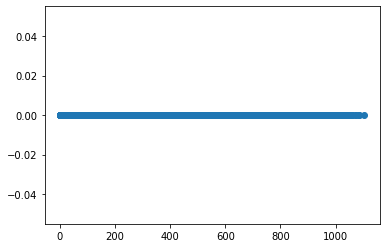

In [42]:
# Separating the points encoded by the Auto-encoder as normal and fraud 
# normal_hidden_rep = hidden_representation.predict(X_normal_scaled) 
# fraud_hidden_rep = hidden_representation.predict(X_fraud_scaled) 
normal_hidden_rep = hidden_representation.predict(x_train) 


# Combining the encoded points into a single table 
# encoded_X = np.append(normal_hidden_rep, fraud_hidden_rep, axis = 0) 
encoded_X = np.array(normal_hidden_rep[:,0]) 

y_normal = np.zeros(normal_hidden_rep.shape[0]) 
# y_fraud = np.ones(fraud_hidden_rep.shape[0]) 
# encoded_y = np.append(y_normal, y_fraud) 
encoded_y = np.array(y_normal) 

# Plotting the encoded points 
plt.scatter(encoded_X, encoded_y) 


In [43]:
normal_hidden_rep.shape[0]

23218

In [44]:
def tsne_plot(x, y): 

    # Setting the plotting background 
    sns.set(style ="whitegrid") 

    tsne = TSNE(n_components = 2, random_state = 0) 

    # Reducing the dimensionality of the data 
    X_transformed = tsne.fit_transform(x) 

    plt.figure(figsize =(12, 8)) 

    # Building the scatter plot 
    plt.scatter(X_transformed[np.where(y == 0), 0], 
                X_transformed[np.where(y == 0), 1], 
                marker ='o', color ='y', linewidth ='1', 
                alpha = 0.8, label ='Normal') 
    plt.scatter(X_transformed[np.where(y == 1), 0], 
                X_transformed[np.where(y == 1), 1], 
                marker ='o', color ='k', linewidth ='1', 
                alpha = 0.8, label ='Fraud') 

    # Specifying the location of the legend 
    plt.legend(loc ='best') 

    # Plotting the reduced data 
    plt.show() 
